In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [36]:
# (1) Используя параметры pandas прочитать красиво пандас 
# --------------------------------------------------------- 1
df = pd.read_csv('UCI_Credit_Card.csv') #DONE

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)

In [33]:
# --------------------------------------------------------- 2.1
df.info()
df.describe()
#DONE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
Unnamed: 0    90 non-null int64
id            90 non-null int64
diet          90 non-null category
pulse         90 non-null int64
time          90 non-null category
kind          90 non-null category
dtypes: category(3), int64(3)
memory usage: 2.7 KB


,Unnamed: 0,id,pulse
count,90.000000,90.000000,90.000000
mean,44.500000,15.500000,99.700000
std,26.124701,8.703932,14.858471
min,0.000000,1.000000,80.000000
25%,22.250000,8.000000,90.250000
50%,44.500000,15.500000,96.000000
75%,66.750000,23.000000,103.000000
max,89.000000,30.000000,150.000000


In [8]:
# --------------------------------------------------------- 2.2
df[['EDUCATION','ID']].groupby('EDUCATION').count()

,ID
EDUCATION,
0,14
1,10585
2,14030
3,4917
4,123
5,280
6,51


In [9]:
df[['SEX', 'LIMIT_BAL']].groupby('SEX').median()

,LIMIT_BAL
SEX,
1,130000.0
2,150000.0


In [10]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
# --------------------------------------------------------- 3
df[(df['SEX']==2) & (df['EDUCATION']==2)].shape[0]
#DONE

8656

In [68]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей
# начинающихся на BILL_ и PAY_
# --------------------------------------------------------- 4
df.loc[1:10,('BILL_AMT1','BILL_AMT6','SEX')]
#TODO

,BILL_AMT1,BILL_AMT6,SEX
1,2682.0,3261.0,2
2,29239.0,15549.0,2
3,46990.0,29547.0,2
4,8617.0,19131.0,1
5,64400.0,20024.0,1
6,367965.0,473944.0,1
7,11876.0,567.0,2
8,11285.0,3719.0,2
9,0.0,13912.0,1
10,11073.0,3731.0,2


In [12]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE
# --------------------------------------------------------- 5

print('1 - MALE // 2 - FEMALE')

pd.pivot_table(data=df,
               values='ID',
               index=['EDUCATION', 'SEX'],
               columns='MARRIAGE',
               aggfunc='count',
               fill_value=0) #DONE[?]

1 - MALE // 2 - FEMALE


MARRIAGE        0     1     2   3
EDUCATION SEX                    
0         1     0     2     6   0
          2     0     2     4   0
1         1     1  1690  2633  30
          2     3  2032  4176  20
2         1     1  2370  2940  63
          2     5  4472  4080  99
3         1    12  1048   894  36
          2    32  1813  1015  67
4         1     0    18    23   1
          2     0    34    45   2
5         1     0    48    46   1
          2     0   102    81   2
6         1     0    14    11   0
          2     0    14    10   2

In [13]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

# --------------------------------------------------------- 6
df2 = df.copy()
df2['LIMIT_BAL_CLASS'] = df2['LIMIT_BAL'].map(lambda a:
                                             'A' if a <= 10000 else
                                             'B' if a <= 100000 else
                                             'C' if a <= 200000 else
                                             'D' if a <= 400000 else
                                             'E' if a <= 700000 else
                                             'F')

df2.head()
#DONE

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,LIMIT_BAL_CLASS
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,B
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,C
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,B
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,B
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,B


In [14]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)

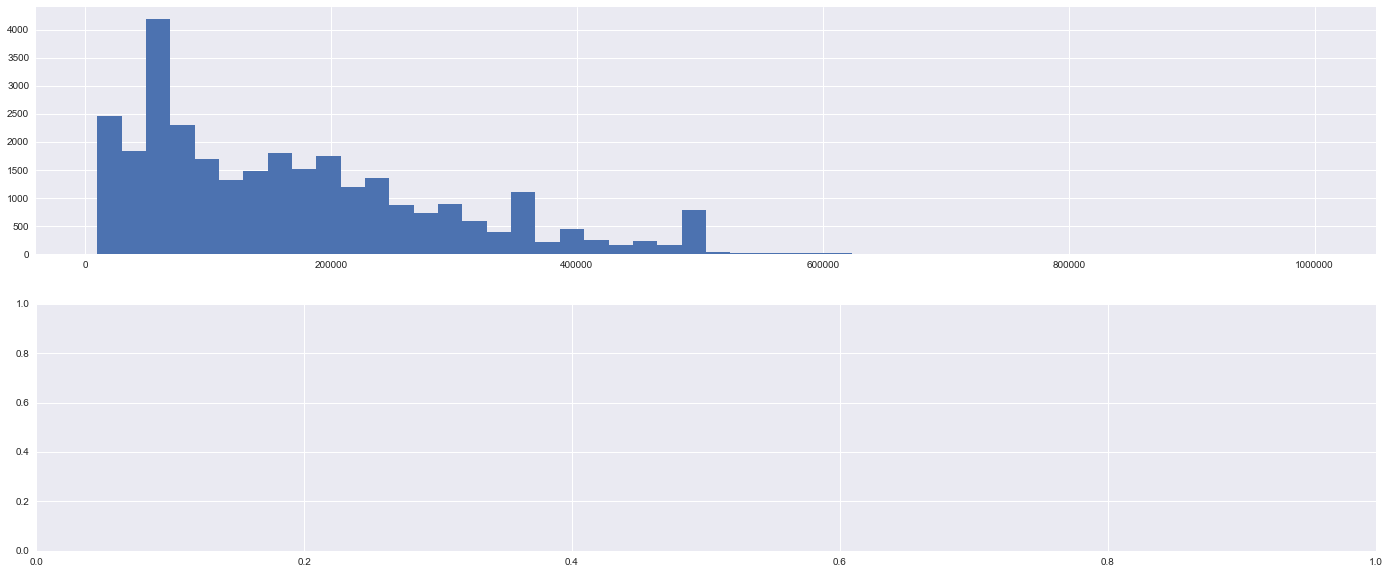

In [15]:
# --------------------------------------------------------- 7
_, ax = plt.subplots(2, 1, figsize=(24,10))

# ------------------------------------------------------------ hist
df2['LIMIT_BAL'].hist(bins=50, ax=ax[0])
#df2['LIMIT_BAL_CLASS'].hist(ax=ax[1]) # -----------------------------------------[??] -- can't plot this

# ------------------------------------------------------------ pivot table
# df2.pivot_table(
#     values='ID',
#     index='LIMIT_BAL',
#     aggfunc='count'
# ).plot(
#     kind='bar', ax=ax[0]
# )

# df2.pivot_table(
#     values='ID',
#     index='LIMIT_BAL_CLASS',
#     aggfunc='count'
# ).plot(
#     kind='bar', ax=ax[1]
# )

# ------------------------------------------------------------ sns form
# sns.factorplot('LIMIT_BAL', data=df2, kind='count', ax=ax[0]) #-----------------[??] -- axes after plot?
# sns.factorplot('LIMIT_BAL_CLASS', data=df2, kind='count', ax=ax[1]) #-----------[??] -- unsorted? axes after plot?

/Users/konstantinfreidlin/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/Users/konstantinfreidlin/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:885: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
/Users/konstantinfreidlin/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:905: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
/Users/konstantinfreidlin/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


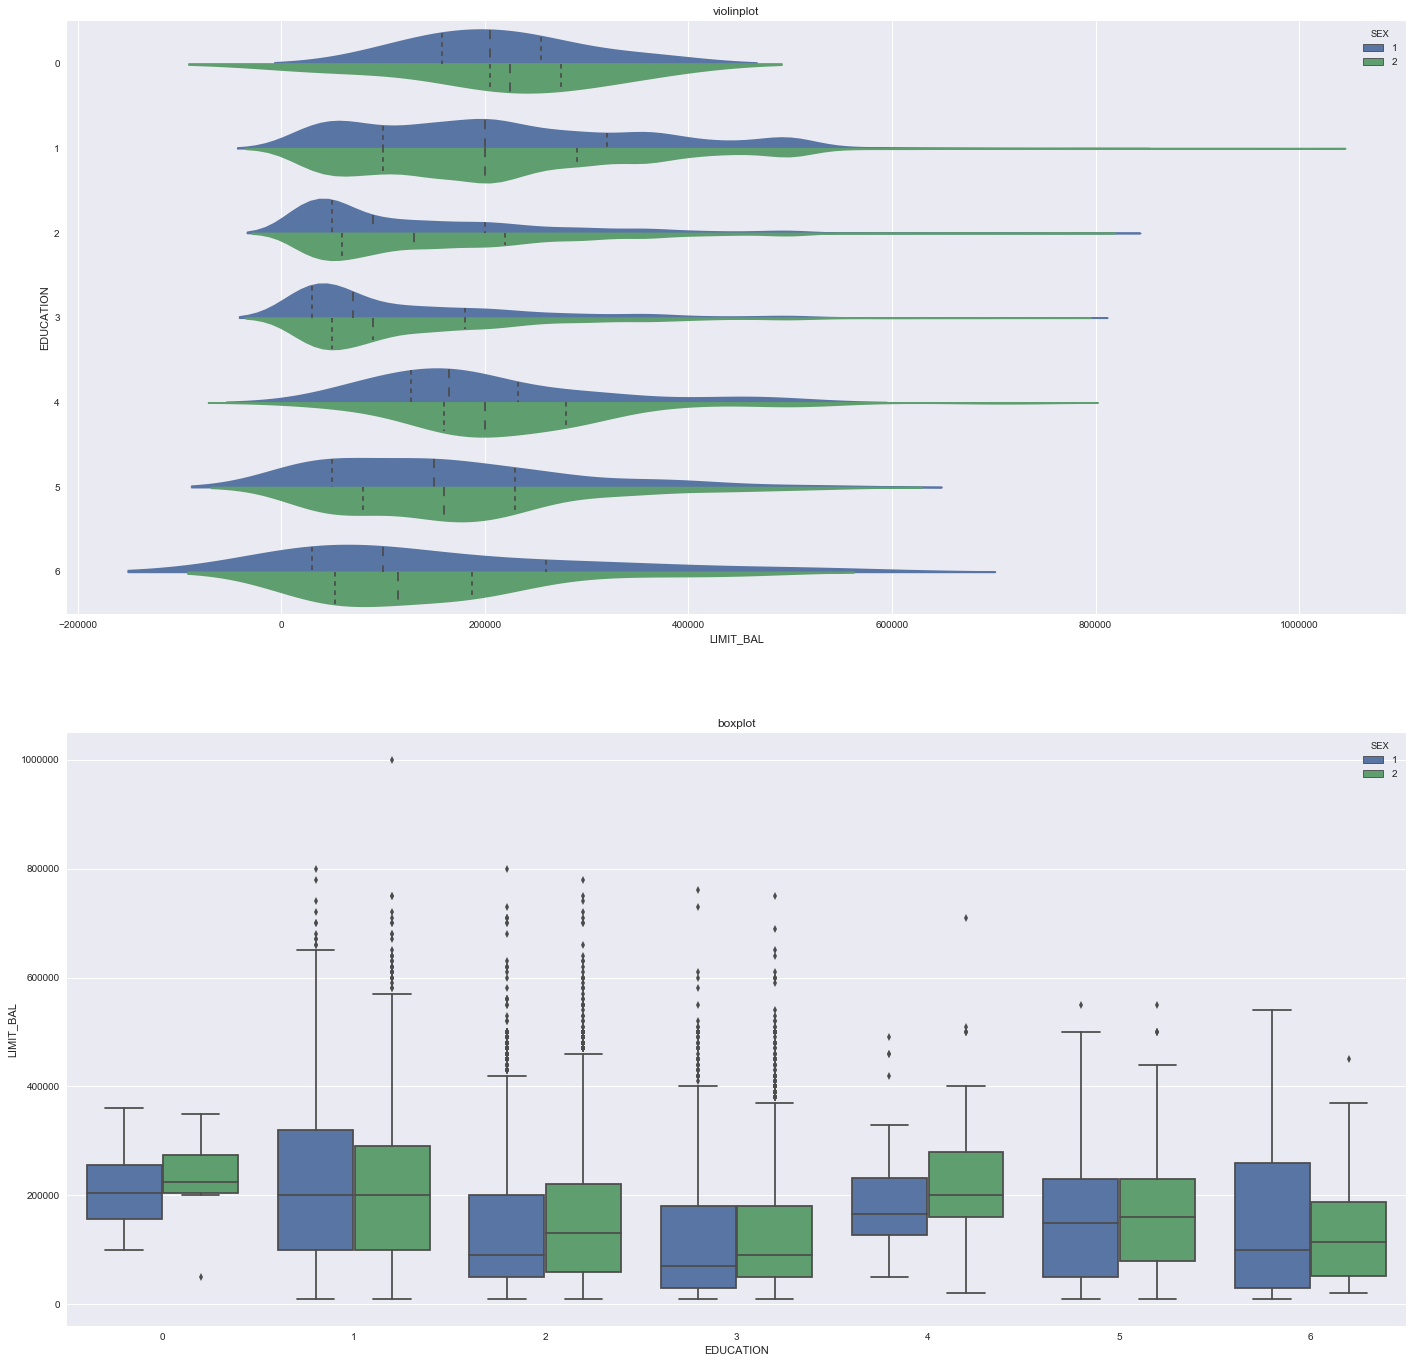

In [16]:
# (8) построить зависимость кредитного лимита от образования для каждого пола
# график необходимо сделать очень широким (на весь экран)

# --------------------------------------------------------- 8
fig = plt.figure(figsize=(24,24))

ax = plt.subplot(2, 1, 1)
ax.title.set_text('violinplot')
sns.violinplot(data=df,
               x='LIMIT_BAL',
               y='EDUCATION',
               hue='SEX',
               split=True,
               inner="quartile",
               orient='h'
              )

ax = plt.subplot(2, 1, 2)
ax.title.set_text('boxplot')
sns.boxplot(data=df,
            x='EDUCATION',
            y='LIMIT_BAL',
            hue='SEX'
           )

#DONE [??]

/Users/konstantinfreidlin/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


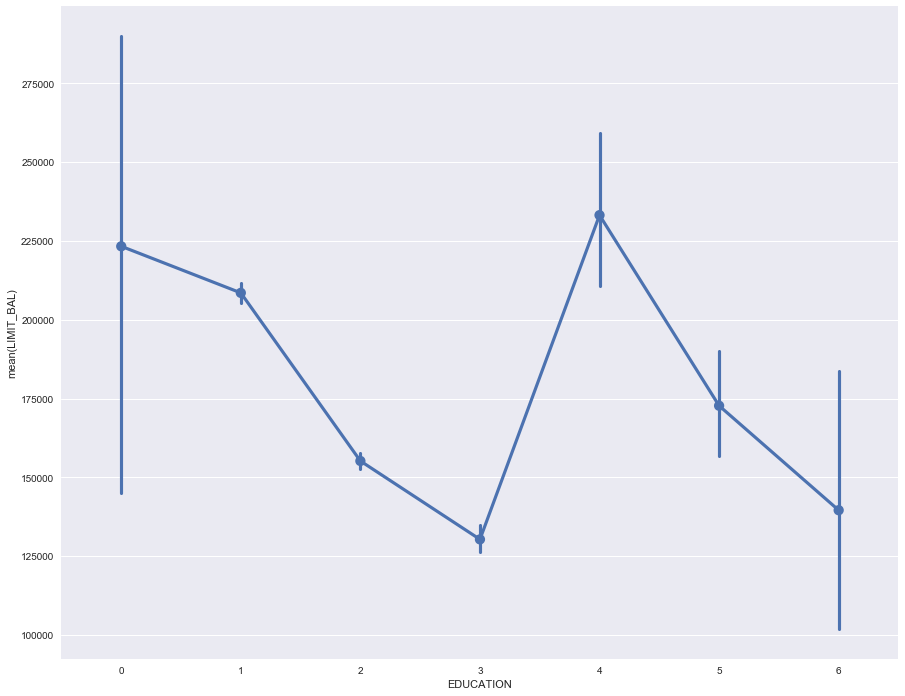

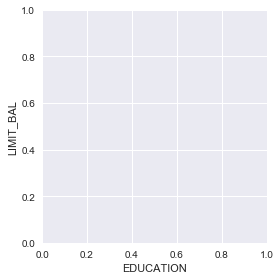

In [57]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов
_, ax = plt.subplots(1, 1, figsize=(15,12))
sns.factorplot(y="LIMIT_BAL", x="EDUCATION", data=df[df['SEX']==2], ax=ax)
#DONE[??]

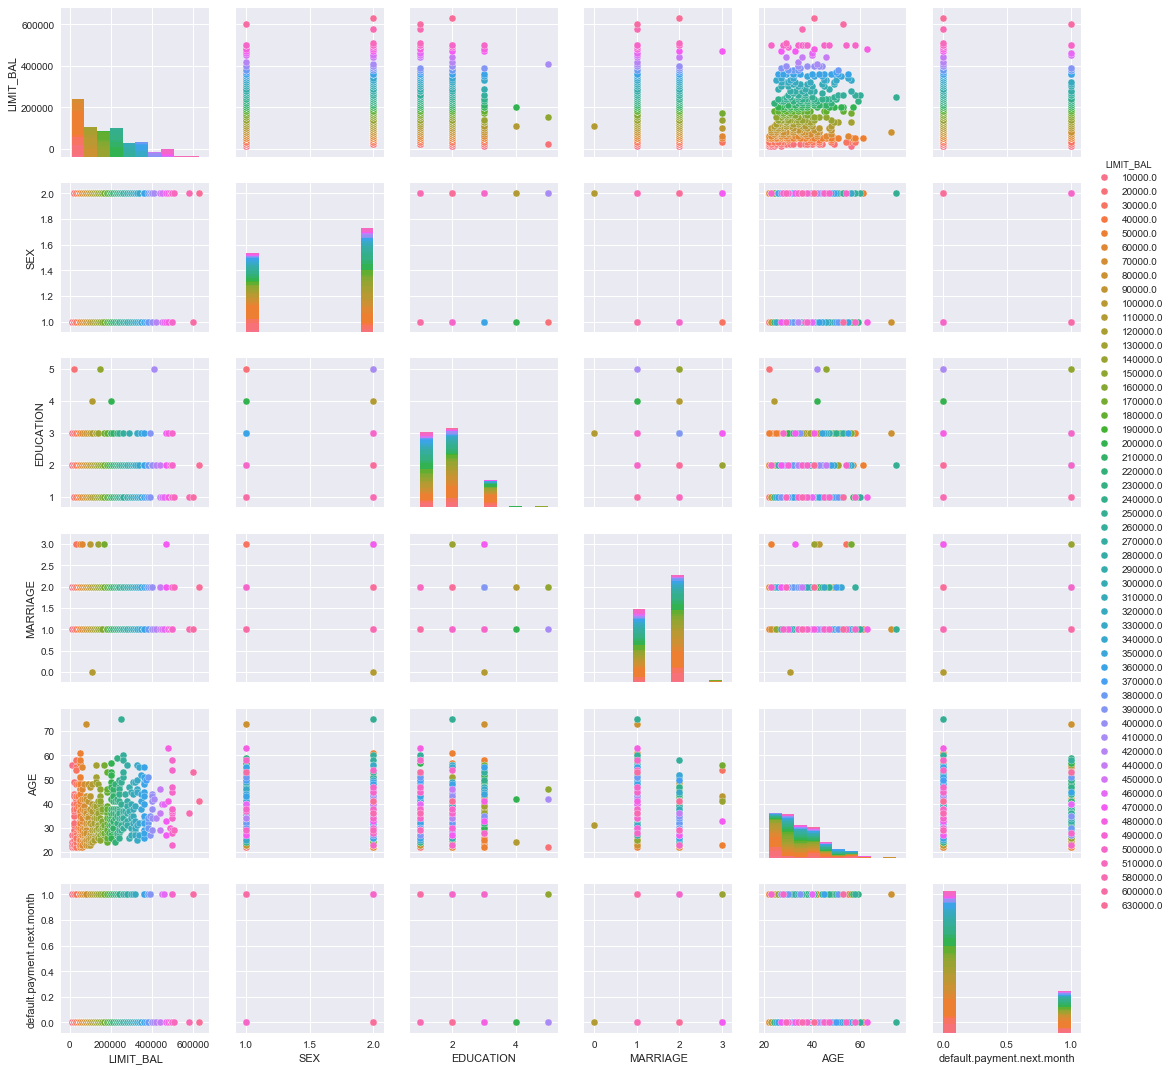

In [30]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)

sns.pairplot(df.loc[1:500,('LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'default.payment.next.month')],
             hue='LIMIT_BAL'
            )
#DONE[??]